## ` Import libs `

In [3]:
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

## ` Load MNIST Dataset `

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
print('X_train shape is :', X_train.shape)
print('X_test shape is :', X_test.shape)
print('y_train shape is :', Y_train.shape)
print('y_test shape is :', Y_test.shape)

X_train shape is : (60000, 28, 28)
X_test shape is : (10000, 28, 28)
y_train shape is : (60000,)
y_test shape is : (10000,)


## ` Show some photos from dataset `

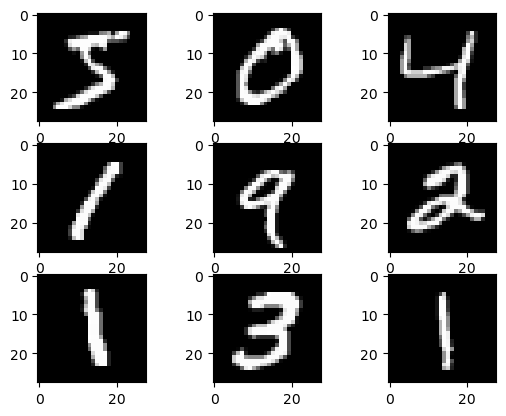

In [6]:
X_train[0]

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [7]:
X_train_r = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[2], 1)
X_test_r = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[2], 1)

## ` normalize some data and Show them` 

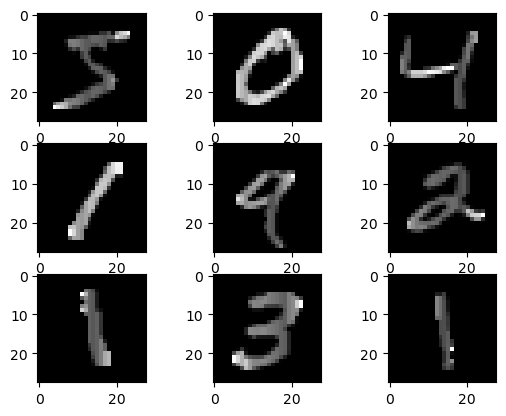

In [8]:
X_train_r = tf.keras.utils.normalize(X_train_r, axis = 1)
X_test_r = tf.keras.utils.normalize(X_test_r, axis = 1)

#Visualising the data after normalization
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.squeeze(X_train_r[i]), cmap=plt.get_cmap('gray'))
plt.show()

In [9]:
image_shape = X_train_r.shape[1:]
print(image_shape)

(28, 28, 1)


## ` Build the network `

In [10]:
model = model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(48, (3,3), activation = tf.nn.relu, input_shape = image_shape))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

## ` Train the network `

In [11]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_r, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 74s 34ms/step - loss: 0.1852 - accuracy: 0.9426
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0694 - accuracy: 0.9782
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0527 - accuracy: 0.9832
Epoch 4/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0411 - accuracy: 0.9871
Epoch 5/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0354 - accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0310 - accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0271 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0233 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0232 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 44s 24m

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        27712     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

## ` Evaluate The Network `

In [14]:
val_loss, val_accuracy = model.evaluate(X_test, Y_test)
print("Validation loss : ", val_loss*100, "%")
print("Validation accuracy : ", val_accuracy*100,"%")

313/313 [==============================] - 3s 8ms/step - loss: 289.9174 - accuracy: 0.8306
Validation loss :  28991.73583984375 %
Validation accuracy :  83.06000232696533 %


## ` Save Model `

In [15]:
model.save('/content/mnist_model')

INFO:tensorflow:Assets written to: /content/mnist_model\assets


INFO:tensorflow:Assets written to: /content/mnist_model\assets


## ` Test The Model `

313/313 [==============================] - 1s 4ms/step
The prediction is :  3


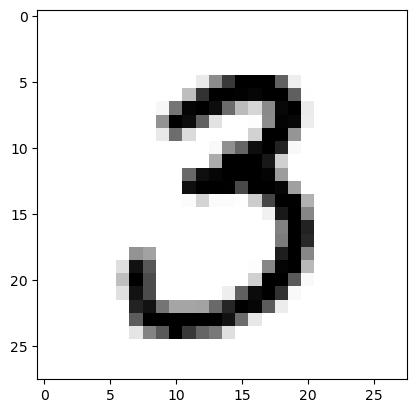

The prediction is :  9


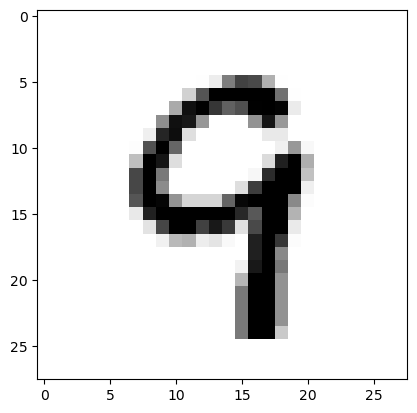

The prediction is :  7


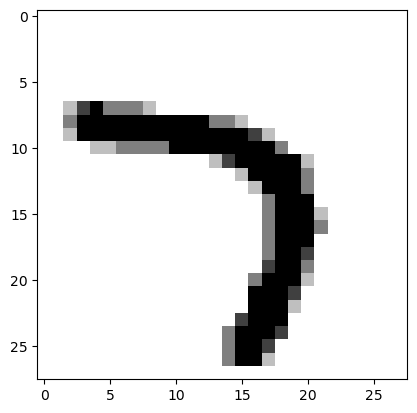

In [21]:
new_model = tf.keras.models.load_model("/content/mnist_model")

predictions = new_model.predict(X_test)

plt.imshow(X_test[90], cmap = plt.get_cmap('binary'))
print("The prediction is : ", np.argmax(predictions[90]))
plt.show()
print('======================================================')


plt.imshow(X_test[150], cmap = plt.get_cmap('binary'))
print("The prediction is : ", np.argmax(predictions[150]))
plt.show()
print('======================================================')


plt.imshow(X_test[60], cmap = plt.get_cmap('binary'))
print("The prediction is : ", np.argmax(predictions[60]))
plt.show()